In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Analyze Data

In [2]:
hData = pd.read_csv("hotel_booking.csv")

In [3]:
hData.shape

(119390, 36)

In [4]:
hData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
hData.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [6]:
hData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Missing Values Calculation

In [7]:
hData.isnull().sum().sort_values(ascending = False)[:5]

company     112593
agent        16340
country        488
children         4
hotel            0
dtype: int64

# Handling Missing Values

In [8]:
hData = hData.drop(['company', 'agent'], axis = 1)

In [9]:
hData.shape

(119390, 34)

In [10]:
hData['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [11]:
hData['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [12]:
hData.fillna({'children':0}, inplace = True)

In [13]:
hData.isnull().sum().sort_values(ascending = False)[:5]

country               488
hotel                   0
adr                     0
assigned_room_type      0
booking_changes         0
dtype: int64

In [14]:
hData['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [15]:
hData.fillna({'country':'other'}, inplace = True)

In [16]:
hData.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Check for Duplication

In [17]:
hData.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              178
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
days_in_waiting_list                 128
customer_type   

In [18]:
hData.duplicated().sum()

0

# Check for Guest

In [19]:
hData[['adults', 'children', 'babies']]  

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [20]:
hData[hData['adults']+hData['children']+hData['babies'] == 0 ].shape

(180, 34)

# Handling Rows with no Guests

In [21]:
hData.drop(hData[hData['adults']+hData['children']+hData['babies'] == 0 ].index , inplace = True)

In [22]:
hData.shape

(119210, 34)

In [23]:
hData[hData['adults']+hData['children']+hData['babies'] == 0 ].shape

(0, 34)

# Type Conversion

In [24]:
hData.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [25]:
hData['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119210, dtype: object

In [26]:
hData['children'] = hData['children'].astype('int64')
hData['reservation_status_date'] = pd.to_datetime(hData['reservation_status_date'], format = '%Y-%m-%d')

In [27]:
hData.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# Adding Calculated Column

In [28]:
hData['total_people']=hData['adults']+hData['children']+hData['babies']
hData['total_stay']=hData['stays_in_weekend_nights']+hData['stays_in_week_nights']

def check_allotation(x):
    if x['reserved_room_type'] != x['assigned_room_type']:
        return 1
    else:
        return 0

hData['same_room_not_alloted'] = hData.apply(lambda x : check_allotation(x), axis =1)

In [29]:
hData.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'total_people', 'total_stay',
       'same_room_not_alloted'],
      dtype='object')

# Statistic Summary

In [30]:
hData.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_people,total_stay,same_room_not_alloted
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,...,0.137094,0.218799,2.321215,101.969092,0.062553,0.571504,2016-07-29 22:20:25.709252864,1.971210,3.426248,0.124117
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,1.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2016-02-01 00:00:00,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2016-08-07 00:00:00,2.000000,3.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,2.000000,4.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,55.000000,69.000000,1.000000
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,...,1.498137,0.638504,17.598002,50.434007,0.245360,0.792876,NaN,0.718876,2.540692,0.329716


# Wrong fill data in ADR(it should be non-negative), as seen in min value

In [31]:
hData['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [32]:
#in ADR column we have negative value that means it has some wrong data 
hData[hData['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_people,total_stay,same_room_not_alloted
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176,2,10,1


# Handling the wrong filled data 

In [33]:
hData.drop(hData[hData['adr']<0].index, inplace  =True)

In [34]:
hData['adr'].describe()

count    119209.000000
mean        101.970001
std          50.433242
min           0.000000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

# Understand the relationships between variables

In [35]:
num_col = hData.select_dtypes(include = np.number).columns
cat_col = hData.select_dtypes(include = ['object']).columns
print("Categorical Variables:")
print(cat_col)
print("Numerical Variables:")
print(num_col)

Categorical Variables:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')
Numerical Variables:
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_people', 'total_stay',
       'same_room_not_alloted'],
      dtype='object')


C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\2465298229.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='Booking %', data=d1, palette='coolwarm')


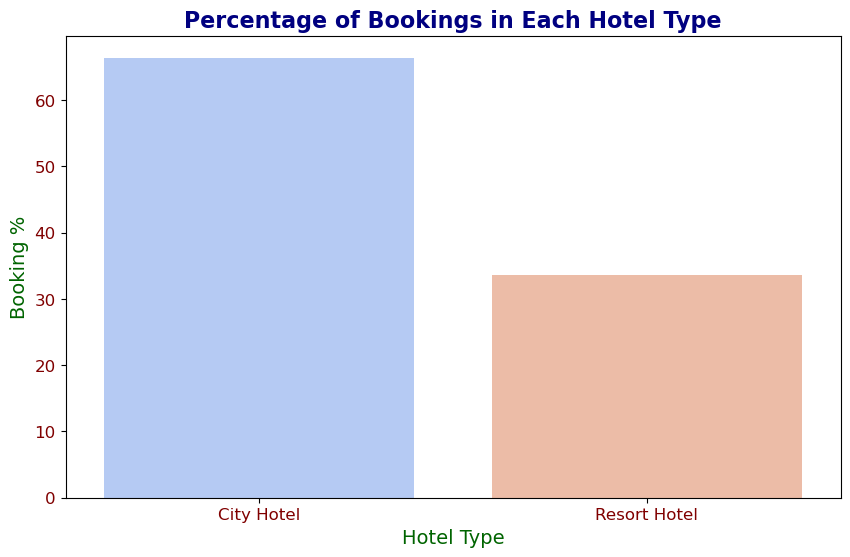

In [36]:
grouped_by_hotel = hData.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hData.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})    
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='Booking %', data=d1, palette='coolwarm')
plt.title('Percentage of Bookings in Each Hotel Type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Hotel Type', fontsize=14, color='darkgreen')
plt.ylabel('Booking %', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=12, color='maroon')
plt.show()

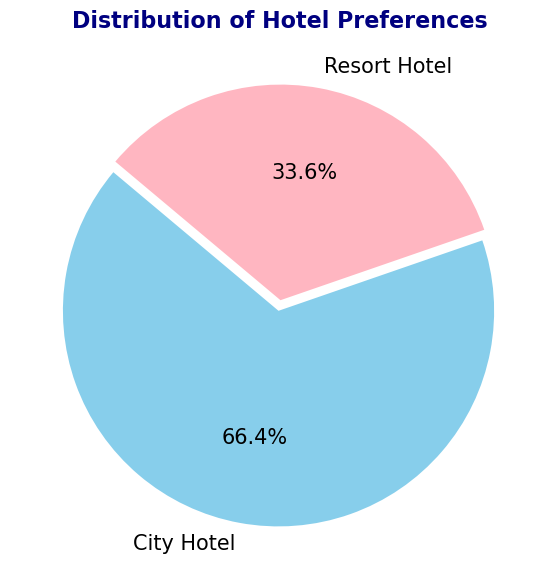

In [37]:
plt.figure(figsize=(7, 7))
hData['hotel'].value_counts().plot.pie(explode=[0.025, 0.025], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'], fontsize=15)
plt.title('Distribution of Hotel Preferences', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('')  # Hide the y-label
plt.show()

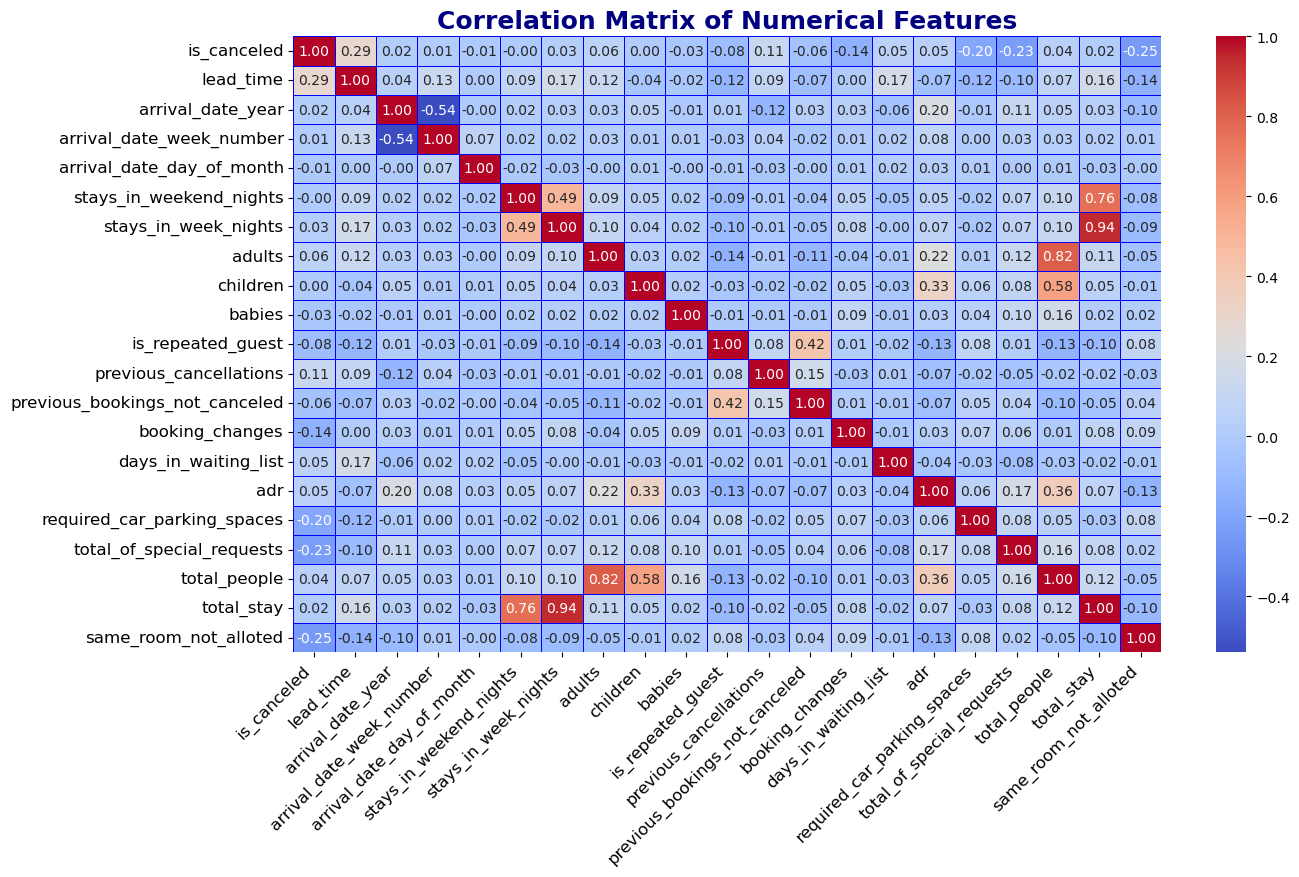

In [38]:
plt.figure(figsize=(14,8))
sns.heatmap(hData[num_col].corr(), annot=True, linewidths=0.5, linecolor='blue', cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold', color='navy')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

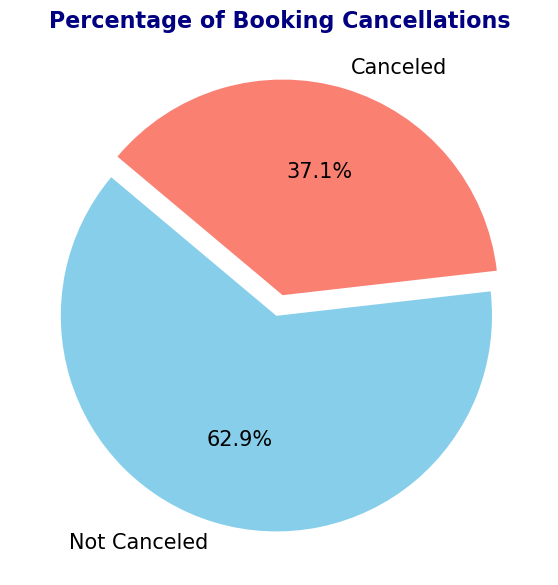

In [39]:
plt.figure(figsize=(7, 7))
hData['is_canceled'].value_counts().plot.pie(
    explode=[0.05, 0.05],
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'salmon'],
    labels=['Not Canceled', 'Canceled'],
    fontsize=15
)
plt.title('Percentage of Booking Cancellations', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('')  # Hide the y-label
plt.show()

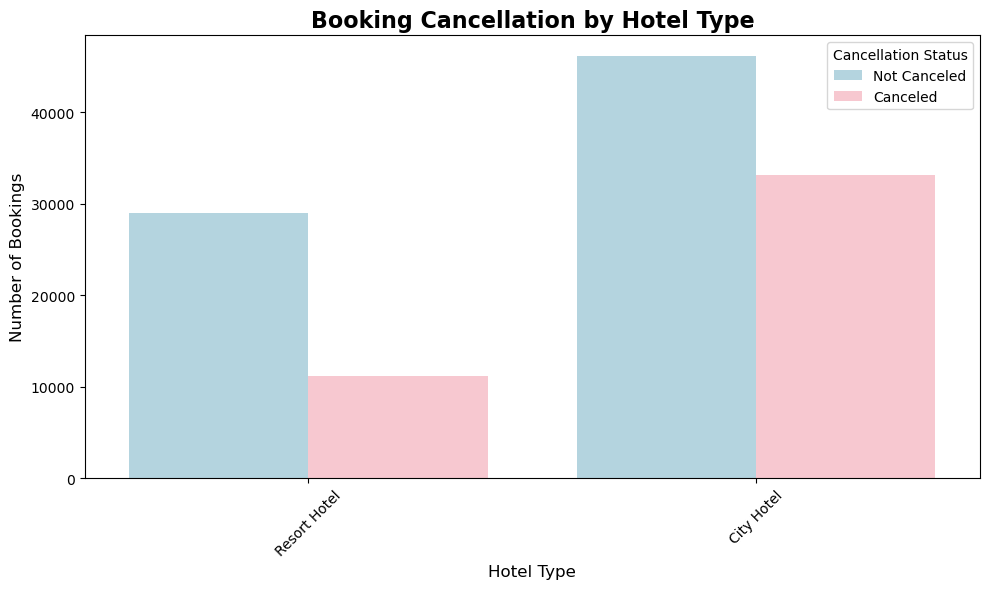

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x="hotel", hue='is_canceled', data=hData, palette=['lightblue', 'pink']) 
plt.title("Booking Cancellation by Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Hotel Type", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

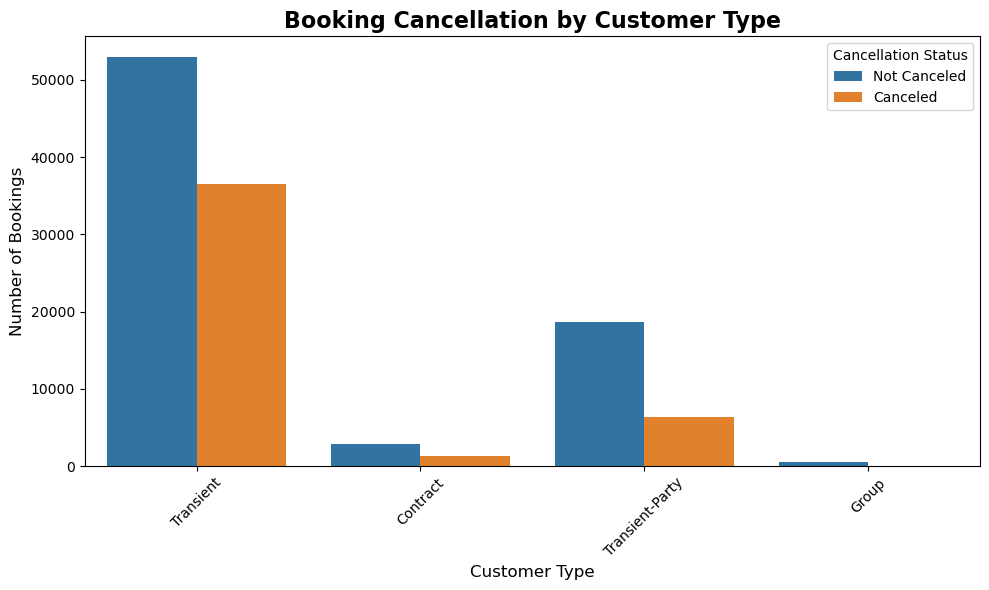

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x="customer_type", hue='is_canceled', data=hData)  
plt.title("Booking Cancellation by Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\1480254487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_hData3.index, y='percentage_canceled', data=temp_hData3, palette=['lightblue', 'orange'])


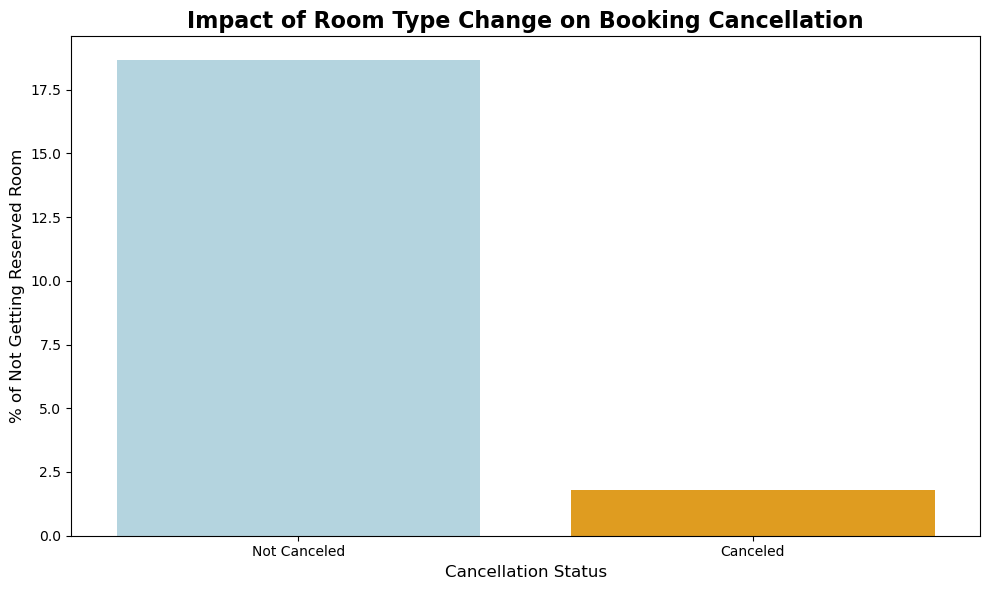

In [42]:
grouped_by_canceled = hData.groupby('is_canceled')

temp_hData3 = pd.DataFrame(grouped_by_canceled['same_room_not_alloted'].sum()*100/grouped_by_canceled.size()).rename(columns={0:'percentage_canceled'})

plt.figure(figsize=(10, 6))
sns.barplot(x=temp_hData3.index, y='percentage_canceled', data=temp_hData3, palette=['lightblue', 'orange']) 
plt.title('Impact of Room Type Change on Booking Cancellation', fontsize=16, fontweight='bold')
plt.xlabel('Cancellation Status', fontsize=12)
plt.ylabel('% of Not Getting Reserved Room', fontsize=12)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\448564270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=temp_hData4, palette=['lightgreen', 'lightpink'])


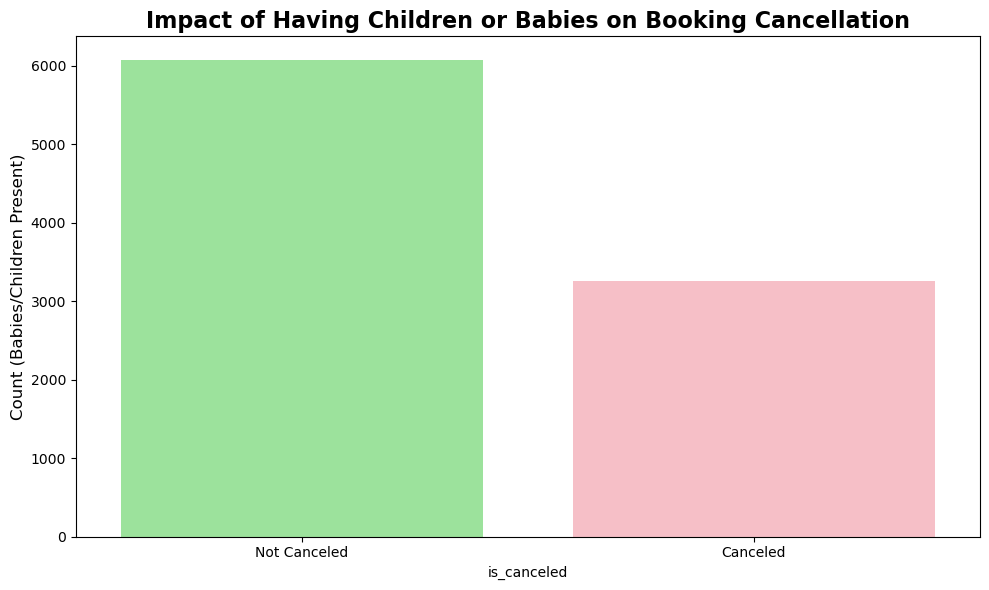

In [43]:
temp_hData4 = hData[(hData['babies'] > 0) | (hData['children'] > 0)]

plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=temp_hData4, palette=['lightgreen', 'lightpink']) 
plt.title('Impact of Having Children or Babies on Booking Cancellation', fontsize=16, fontweight='bold')
plt.ylabel('Count (Babies/Children Present)', fontsize=12)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\2743869252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_hData5.index, y=temp_hData5['Cancellation Percentage'], palette='viridis')


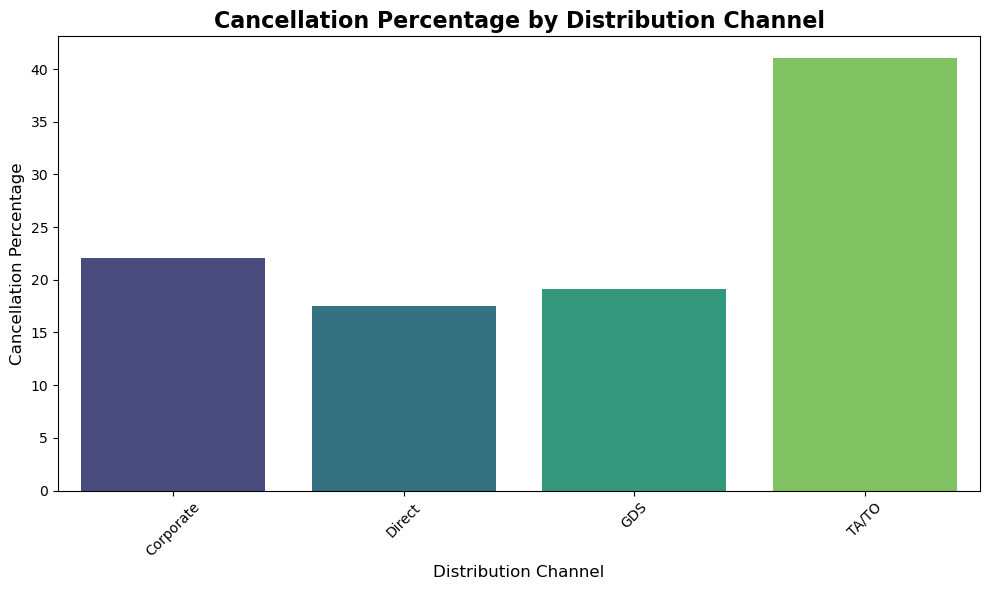

In [44]:
grp_by_dc = hData.groupby('distribution_channel')

temp_hData5 = pd.DataFrame((grp_by_dc['is_canceled'].sum()/grp_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancellation Percentage'})

plt.figure(figsize=(10, 6))
sns.barplot(x=temp_hData5.index, y=temp_hData5['Cancellation Percentage'], palette='viridis') 
plt.title('Cancellation Percentage by Distribution Channel', fontsize=16, fontweight='bold')
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Cancellation Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\1137352708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meal', data=hData, palette='coolwarm')


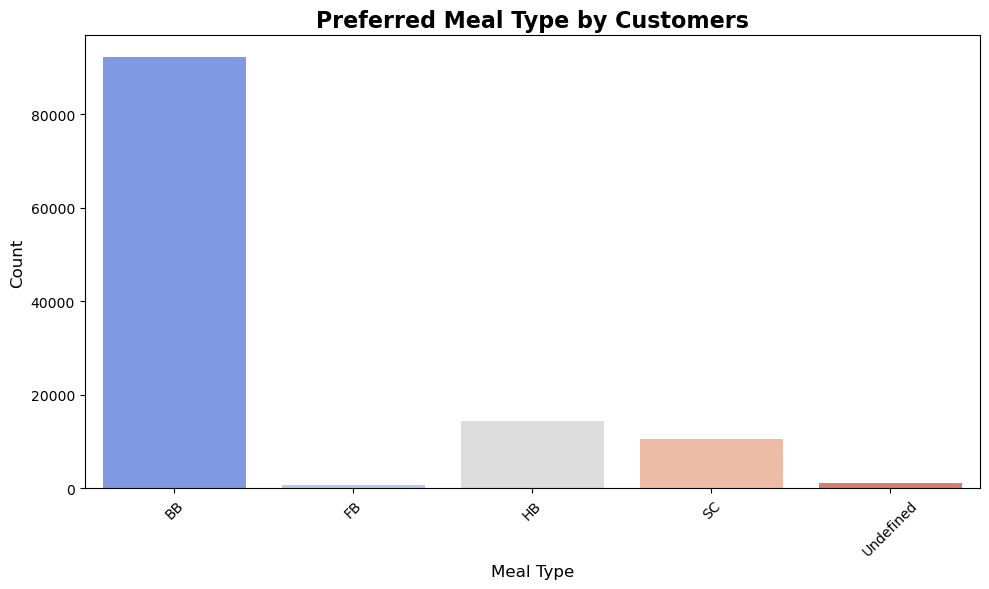

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', data=hData, palette='coolwarm') 
plt.title('Preferred Meal Type by Customers', fontsize=16, fontweight='bold')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\3254904038.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = hData.groupby('arrival_date_month').size()


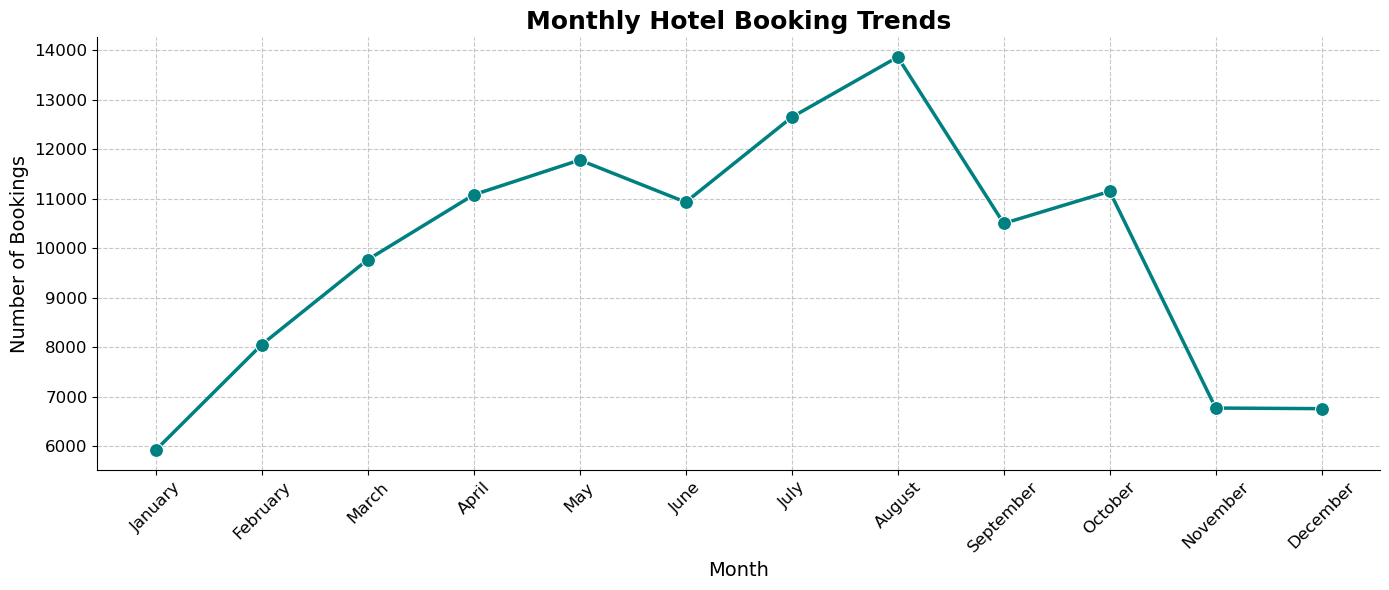

In [46]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hData['arrival_date_month'] = pd.Categorical(hData['arrival_date_month'], categories=month_order, ordered=True)
monthly_bookings = hData.groupby('arrival_date_month').size()
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_bookings.index, y=monthly_bookings.values, marker='o', linestyle='-', color='teal', markersize=10, linewidth=2.5)
plt.title('Monthly Hotel Booking Trends', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.tight_layout()
plt.show()

# Identifying Outliers

In [47]:
hData[hData['adr'] > 500]['adr'].sort_values(ascending=False)

48515     5400.0
111403     510.0
15083      508.0
Name: adr, dtype: float64

In [48]:
temp_hData1 = hData[hData['adr'] < 1000]

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\2190236402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='adr', data=temp_hData1, palette='muted')


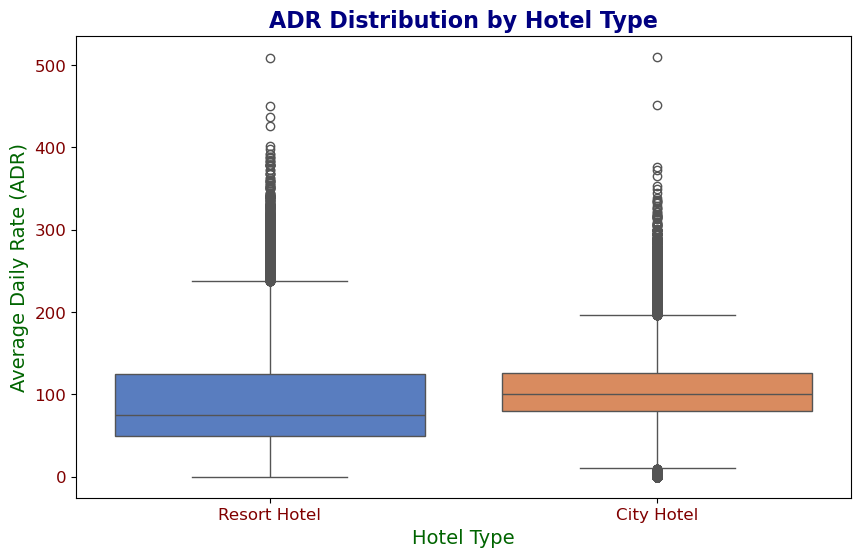

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=temp_hData1, palette='muted')
plt.title('ADR Distribution by Hotel Type', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Hotel Type', fontsize=14, color='darkgreen')
plt.ylabel('Average Daily Rate (ADR)', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=12, color='maroon')
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\2664613059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assigned_room_type', y='adr', data=temp_hData1, palette='muted')


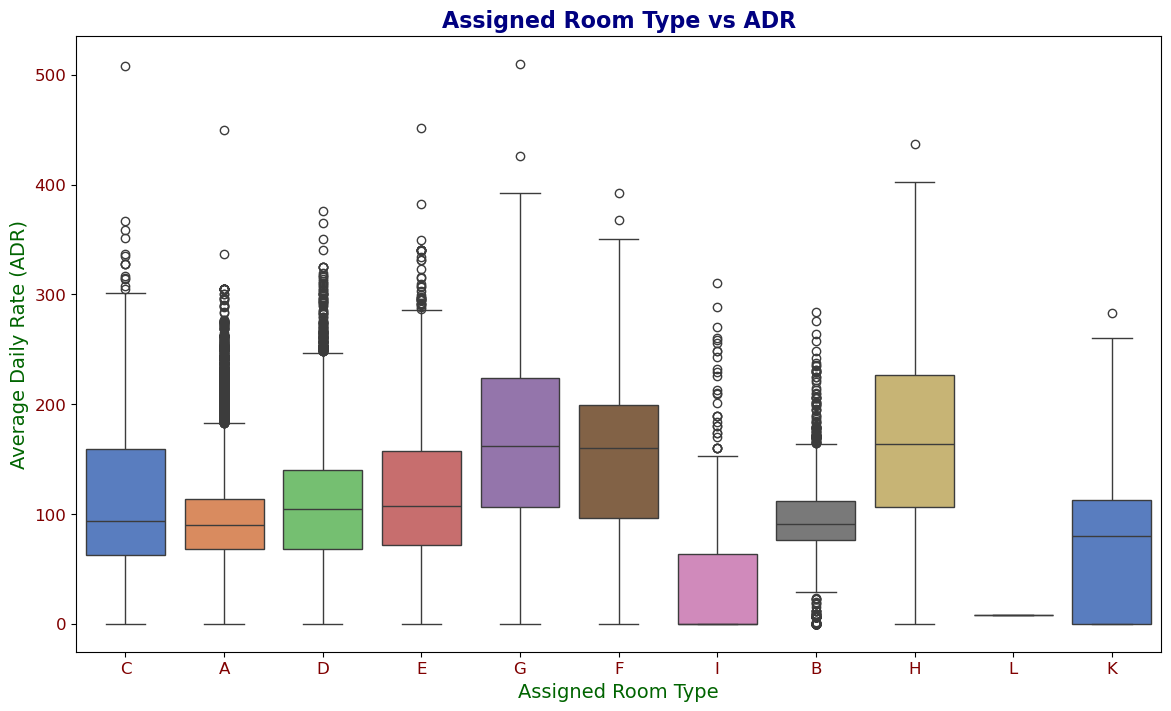

In [50]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='assigned_room_type', y='adr', data=temp_hData1, palette='muted')
plt.title('Assigned Room Type vs ADR', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Assigned Room Type', fontsize=14, color='darkgreen')
plt.ylabel('Average Daily Rate (ADR)', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='maroon')
plt.yticks(fontsize=12, color='maroon')
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\2721466737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='same_room_not_alloted', y='adr', data=temp_hData1, palette=['lightgreen', 'red'])


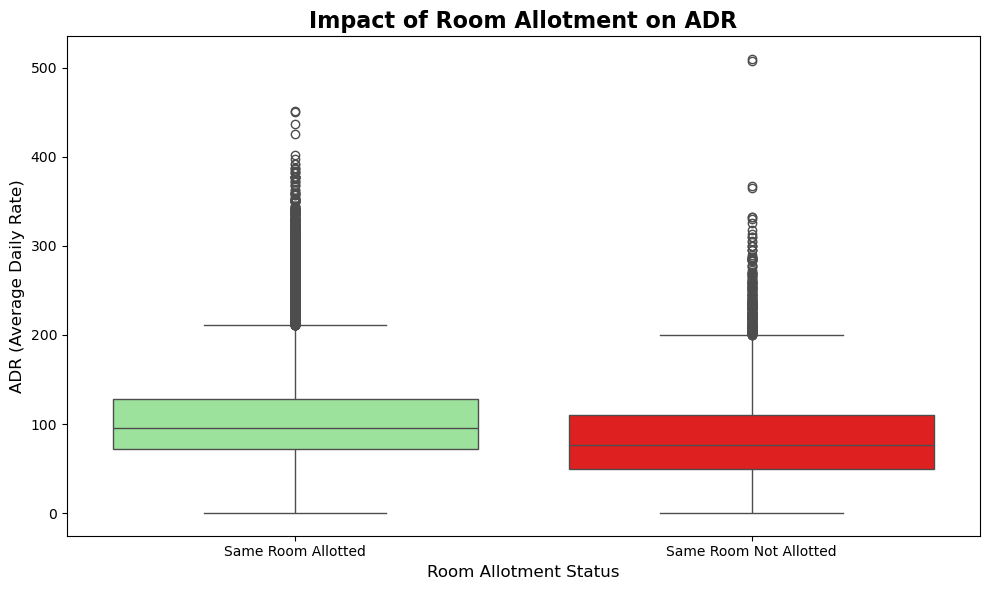

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='same_room_not_alloted', y='adr', data=temp_hData1, palette=['lightgreen', 'red'])  
plt.xlabel('Room Allotment Status', fontsize=12)
plt.ylabel('ADR (Average Daily Rate)', fontsize=12)
plt.title('Impact of Room Allotment on ADR', fontsize=16, fontweight='bold')
plt.xticks([0, 1], ['Same Room Allotted', 'Same Room Not Allotted'])
plt.tight_layout()
plt.show()

C:\Users\Nubeed Sohail T-W\AppData\Local\Temp\ipykernel_4772\3122079063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_date_month', y='adr', data=hData, palette="viridis")


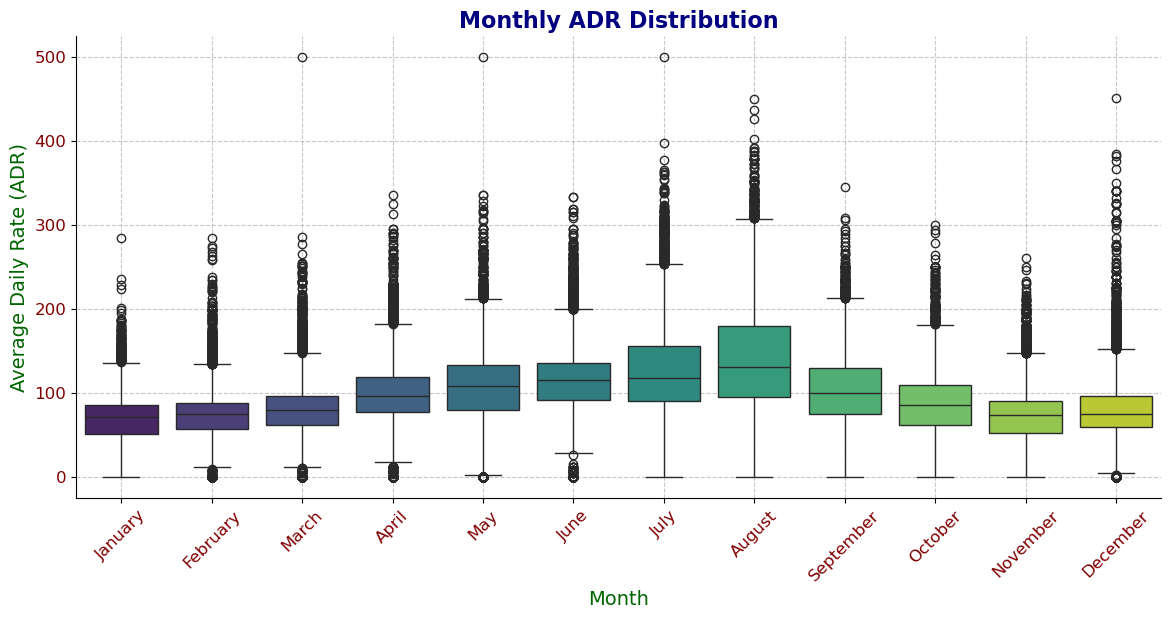

In [52]:
hData['adr'] = hData['adr'].clip(upper=500)
reindex = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hData['arrival_date_month'] = pd.Categorical(hData['arrival_date_month'], categories=reindex, ordered=True)
plt.figure(figsize=(14, 6))
sns.boxplot(x='arrival_date_month', y='adr', data=hData, palette="viridis")
plt.title('Monthly ADR Distribution', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=14, color='darkgreen')
plt.ylabel('Average Daily Rate (ADR)', fontsize=14, color='darkgreen')
plt.xticks(rotation=45, fontsize=12, color='maroon')
plt.yticks(fontsize=12, color='maroon')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.show()